<a href="https://colab.research.google.com/github/cl49/EPU_ML_Angers_2023/blob/main/Jour%201/alzheimer_detection_and_classification_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alzheimer Detection and Classifier

## 1. Problem Definition
> Alzheimer est le plus connu pour les causes de la démence. Il représente les deux tiers de la population totale de la démence, alors que la cause est encore inconnue. Selon des articles de Lancet Neurology, même l'ancienne théorie comme les inflammations neurales, qui était considérée comme moins importante que les protéines tau, les bêta-amyloïdes et les facteurs génétiques (Apo E4).

Avant de commencer, je dois expliquer un peu plus sur Alzheimer, car les données contiennent 4 classes d'Alzheimer qui dépendent de la gravité de la démence.

Il y a des degrés de gravité dans l'Alzheimer.

1. Très légèrement dément : C'est le stade où le patient commence à oublier où il a mis ses affaires, les noms des autres personnes récemment, etc. Il est difficile de le détecter par un test de capacité cognitive.
2. Légèrement dément : C'est le stade où les patients ne se souviennent pas des mots, ne trouvent pas leur chemin vers la destination, perdent la concentration et les capacités de travail. C'est aussi le stade où les patients oublient même qu'ils perdent la mémoire. À partir de ce stade, avec des tests cognitifs, cela peut être détecté.
3. Modérément dément : Commence à oublier les activités récentes, d'importantes histoires anciennes, a du mal à calculer le budget, à sortir seul et perd de l'empathie.
Il y a 3 autres stades dans la démence modérée, qui, au stade terminal, le patient ne peut plus se déplacer seul, tout en perdant la capacité de parler. Mais je suppose que l'ensemble de données actuel de Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset] considère tous ces stades fusionnés sous 'Modérément dément' ou même pas considérés.

Connaître ces stades est important car plus le stade du patient est avancé, plus le traitement aura un effet important en termes de ralentissement du processus. Si la démence est découverte pendant le stade modérément dément, on sait que le patient décédera dans les 3 ans. (Un des cas signalés est un guitariste rythmique Malcolm du groupe AC/DC, diagnostiqué d'une démence sévère en 2014.)

Ainsi, avoir une IA qui détecte la démence d'Alzheimer à un stade précoce peut permettre une espérance de vie plus longue pour le patient ainsi qu'une meilleure qualité de vie globale grâce au ralentissement de la démence.

Comme Alzheimer peut non seulement être détecté par des tests de capacité cognitive, mais aussi par IRM ou CT en regardant les ventricules du cerveau et l'atrophie corticale, le fondement théorique de ce projet est solide. Les médecins trouvent que les patients atteints d'Alzheimer ont un cerveau qui a des ventricules agrandis (qui se trouvent au centre du cerveau) ainsi qu'une zone corticale grise plus mince.

## 2. Spécification de la Solution
Ce projet va explorer divers modèles de ML en se concentrant sur des techniques avancées telles que les Arbres de Décision (DT) et les Forêts Aléatoires (RF). Nous allons examiner la performance de ces modèles pour déterminer lequel fonctionne le mieux dans le contexte de notre étude.

Le projet sera divisé en 2 sections principales : la Détection de l'Alzheimer et la Classification de l'Alzheimer. Dans la section de détection, les modèles d'Arbres de Décision et de Forêts Aléatoires seront utilisés pour analyser les images cérébrales des tests et identifier les signes potentiels de la maladie d'Alzheimer.

D'autre part, la Classification de l'Alzheimer impliquera l'entraînement des modèles avec des données représentant différents stades de la maladie. Cela correspond à la manière dont les données ont été initialement collectées, rendant ces modèles utiles non seulement pour la détection mais aussi pour la classification précise des stades de la maladie. L'objectif est de fournir un outil de support aux médecins, aidant au diagnostic de la maladie d'Alzheimer. Une détection précoce et une classification précise sont essentielles pour améliorer l'espérance et la qualité de vie des patients grâce à des interventions et traitements adaptés.

Résumé : Mon objectif est de mettre en œuvre et d'évaluer les modèles d'Arbres de Décision et de Forêts Aléatoires pour la détection de l'Alzheimer (présence ou absence de la maladie) ainsi que pour la classification de ses stades (absence, très léger, léger, modéré).

Préparer les données de deux manières différentes.

1. Détection de l'Alzheimer : Déterminer si le patient a l'Alzheimer ou non (non vs toutes les autres catégories)
2. Classificateur de l'Alzheimer : Définir à quel stade le patient se trouve dans l'Alzheimer.
La modèles qui vont être testés ici sont


In [ ]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

In [ ]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [ ]:
!unzip gdrive/My\ Drive/Formation_ICO/Jour1/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Non_Demented/non_2057.jpg  
  inflating: __MACOSX/Non_Demented/._non_2057.jpg  
  inflating: Non_Demented/non_2731.jpg  
  inflating: __MACOSX/Non_Demented/._non_2731.jpg  
  inflating: Non_Demented/non_1238.jpg  
  inflating: __MACOSX/Non_Demented/._non_1238.jpg  
  inflating: Non_Demented/non_2725.jpg  
  inflating: __MACOSX/Non_Demented/._non_2725.jpg  
  inflating: Non_Demented/non_2043.jpg  
  inflating: __MACOSX/Non_Demented/._non_2043.jpg  
  inflating: Non_Demented/non_1562.jpg  
  inflating: __MACOSX/Non_Demented/._non_1562.jpg  
  inflating: Non_Demented/non_1204.jpg  
  inflating: __MACOSX/Non_Demented/._non_1204.jpg  
  inflating: Non_Demented/non_2719.jpg  
  inflating: __MACOSX/Non_Demented/._non_2719.jpg  
  inflating: Non_Demented/non_1210.jpg  
  inflating: __MACOSX/Non_Demented/._non_1210.jpg  
  inflating: Non_Demented/non_1576.jpg  
  inflating: __MACOSX/Non_Demented/._non_1576.jpg  
  inflating: Non_De

In [ ]:
#Dataset that should go with Alzheimer label
very_mild = glob('Very_Mild_Demented/*')
mild = glob('Mild_Demented/*')
moderate = glob('Moderate_Demented/*')

#Dataset without Alzheimer
non = glob('Non_Demented/*')

Non_Demented/non_2075.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

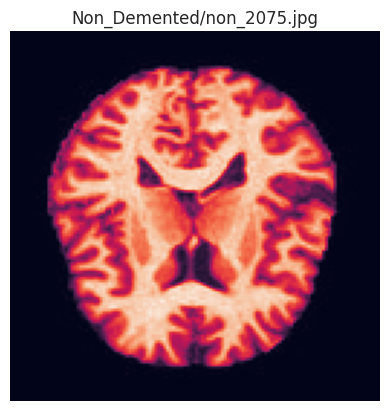

In [ ]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

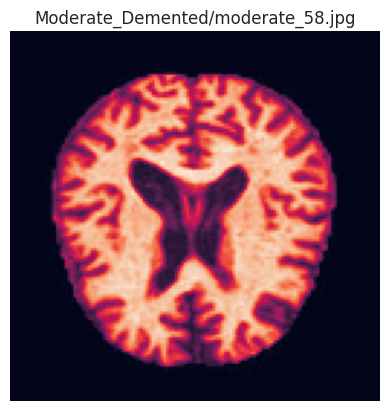

In [ ]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

## 3. Testing and Analysis
## 3.1 Alzheimer Detection Models

### Random Forest for Alzheimer Detection

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is Alzheimer (0) or not Alzheimer (1)
resized_image_array_label=[]

width = 128
height = 128
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [ ]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct RF
print(len(resized_image_array))

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400


In [ ]:
# train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  # You can adjust the parameters as needed
clf.fit(train_x, train_y)

# store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

# assess the performance of the Decision Tree on Training data
from sklearn import metrics
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))  # The training seems to be done with high accuracy on training data.

# Now, use the Decision Tree model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

# assess the performance of the Decision Tree on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2590    0]
 [   0 2530]]
Accuracy :  0.77578125
Precision :  0.7754188129379553
Recall :  0.7759114264741864
f1 :  0.7755279242748927
Confusion matrix : [[475 135]
 [152 518]]


In [ ]:
# train Random Forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees
clf.fit(train_x, train_y)

# store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

# assess the performance of the RF on Training data
from sklearn import metrics
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))  # The training seems to be done with high accuracy on training data.

# Now, use the RF model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

# assess the performance of the RF on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2590    0]
 [   0 2530]]
Accuracy :  0.946875
Precision :  0.9465690634193062
Recall :  0.9471984340592121
f1 :  0.9468001877640433
Confusion matrix : [[582  28]
 [ 40 630]]


Already from the RF's, the performance of the model is very promising. Considering that this model is not those of so-what-called 'State-of-the-Art', it still has a stellar performance.

# Alzheimer classifier

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 128
height = 128
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 128 by 128
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

print('Number of Images in "non" folder:',len(non))
print('Number of Images in "very_mild" folder:',len(very_mild))
print('Number of Images in "mild" folder:',len(mild))
print('Number of Images in "moderate" folder:',len(moderate))



Number of Images in "non" folder: 3200
Number of Images in "very_mild" folder: 2240
Number of Images in "mild" folder: 896
Number of Images in "moderate" folder: 64


Accuracy :  1.0
Accuracy :  0.90703125
Precision :  0.9484281554926031
Recall :  0.7152670040662374
f1 :  0.7676282739652798


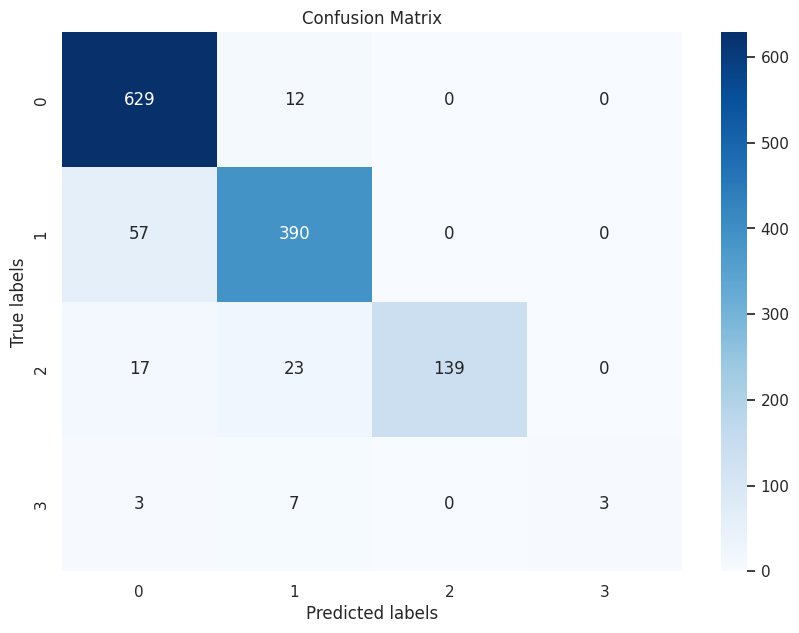

In [ ]:
#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)  # Adjust the number of trees as necessary

# Fit the model on the training data
clf.fit(train_x, train_y)

# Store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the RF with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the RF model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true, y_pred, average='macro'))  # Adjust average parameter as needed
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy:  1.0
Testing Accuracy:  0.9015625
Accuracy :  0.9015625
Precision :  0.948742506835125
Recall :  0.8588798997949946
f1 :  0.8968592534554428


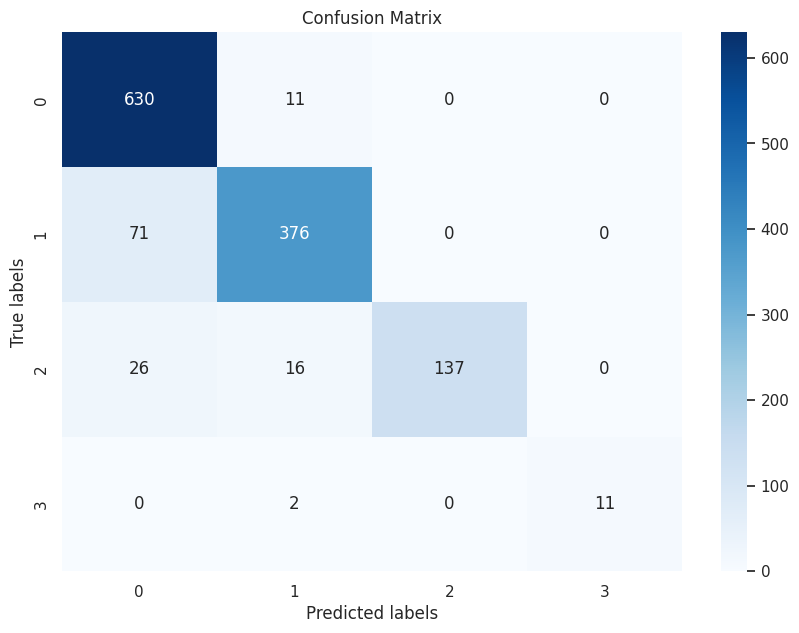

In [ ]:
# Create a Random Forest Classifier with balanced class weights
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')  # Adjust the number of trees as necessary

# Fit the model on the training data
clf.fit(train_x, train_y)

# Store predictions and ground truth for the training set
y_pred_train = clf.predict(train_x)
y_true_train = train_y

# Assess the performance of the classifier on Training data
print('Training Accuracy: ', metrics.accuracy_score(y_true_train, y_pred_train))

# Now, use the model to predict Test data
y_pred_test = clf.predict(test_x)
y_true_test = test_y

# Assess the performance of the classifier on Testing data
print('Testing Accuracy: ', metrics.accuracy_score(y_true_test, y_pred_test))
print('Accuracy : ', metrics.accuracy_score(y_true_test, y_pred_test))
print('Precision : ', metrics.precision_score(y_true_test, y_pred_test, average='macro'))  # Adjust average parameter as needed
print('Recall : ', metrics.recall_score(y_true_test, y_pred_test, average='macro'))  # Adjust average parameter as needed
print('f1 : ', metrics.f1_score(y_true_test, y_pred_test, average='macro'))  # Adjust average parameter as needed
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_true_test, y_pred_test)
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()